# ML: Assignment 3

## Libraries

### Installs & External

In [1]:
# !pip install tensorflow-macos nltk

### Imports

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.data_loading import DataLoader
from src.data_processing import Process

from src.next_word_model import NextWordModel

from src.prediction_evaluation import Evaluator

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tilmankerl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pipeline

### Data Loading & Processing

In [4]:
dl = DataLoader()
process = Process(
    dl,
    sample_factor = 0.95
)

In [5]:
X_train, X_test, y_train, y_test = process.process(force = True)

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/data_processing.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["hasLink"] = df.text.str.contains(url_regex)


### Model Init & Training

In [6]:
model = NextWordModel(
    processor=process,
    load_existing=True
)

Loading existing model failed:
No file or directory found at /Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/_objects/lstm.nextword.model
(15176,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             151760    
                                                                 
 lstm (LSTM)                 (None, 1, 100)            44400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 15176)             1532776   
                                                                 
Total params: 1

In [7]:
model.train(X_train, y_train, epochs = 100)

Epoch 1/100


2023-02-25 00:37:34.304767: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3356/3356 [==============================] - 61s 18ms/step - loss: 6.5664 - accuracy: 0.0584
Epoch 2/100
3356/3356 [==============================] - 58s 17ms/step - loss: 6.1968 - accuracy: 0.0848
Epoch 3/100
3356/3356 [==============================] - 58s 17ms/step - loss: 5.9336 - accuracy: 0.1115
Epoch 4/100
3356/3356 [==============================] - 57s 17ms/step - loss: 5.7665 - accuracy: 0.1266
Epoch 5/100
3356/3356 [==============================] - 57s 17ms/step - loss: 5.6248 - accuracy: 0.1378
Epoch 6/100
3356/3356 [==============================] - 58s 17ms/step - loss: 5.5083 - accuracy: 0.1447
Epoch 7/100
3356/3356 [==============================] - 58s 17ms/step - loss: 5.4182 - accuracy: 0.1491
Epoch 8/100
3356/3356 [==============================] - 58s 17ms/step - loss: 5.3452 - accuracy: 0.1516
Epoch 9/100
3356/3356 [==============================] - 57s 17ms/step - loss: 5.2854 - accuracy: 0.1546
Epoch 10/100
3356/3356 [==============================] - 57s 17ms/

INFO:tensorflow:Assets written to: /Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/_objects/lstm.nextword.model/assets


INFO:tensorflow:Assets written to: /Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/_objects/lstm.nextword.model/assets


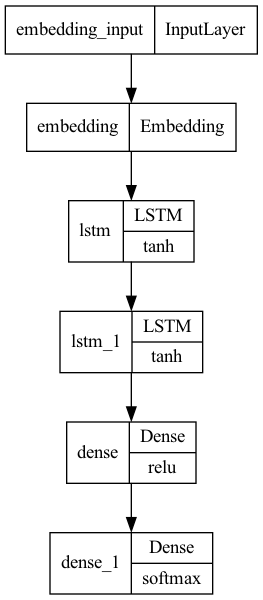

In [8]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


### Model Evaluation

In [9]:
pred = model.predict("america")
print(pred)

great


In [10]:
ev = Evaluator(model)

In [11]:
len(X_test)

107383

In [12]:
X_test = X_test[0:2500]
y_test = y_test[0:2500]

In [13]:
ev.evaluate(X_test, y_test, eval_type="id")

ERRORS:  0
Accuracy: 1.76%


1.76

In [14]:
ev.evaluate(X_test, y_test, eval_type="lemma")

Accuracy: 1.84%


1.84

In [15]:
acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding")

Accuracy: 21.12%


(array([0.04436073, 0.        , 0.        , 0.        , 0.        ,
        0.0443607 , 0.13308231, 0.        , 0.13308231, 0.13308209,
        0.3105254 , 0.26616419, 0.13308231, 0.22180349, 0.39924694,
        0.44360698, 0.39924628, 0.31052591, 0.93157466, 0.57668907,
        0.75413187, 0.31052591, 1.02029605, 0.79849256, 0.62104977,
        1.06466027, 1.50826373, 1.41954234, 1.64134583, 1.55262956,
        1.37518164, 2.12931351, 1.90751002, 1.50826872, 1.90751002,
        2.12931351, 1.68570653, 1.6857121 , 1.99623141, 1.68570653,
        1.55262443, 1.81879463, 2.2623956 , 1.50826373, 1.86314932,
        2.43983839, 1.90751002, 1.68571767, 1.99623141, 2.2623956 ,
        3.23833096, 3.14960956, 2.1736742 , 1.77442792, 2.04059211,
        1.81880064, 2.04059211, 2.48419909, 2.57292049, 1.64134583,
        2.12931351, 2.3067563 , 1.24209955, 1.90752263, 1.24209955,
        2.12931351, 1.55262443, 1.28646024, 1.50826373, 1.68570653,
        0.97593536, 1.5082737 , 1.33082094, 1.02

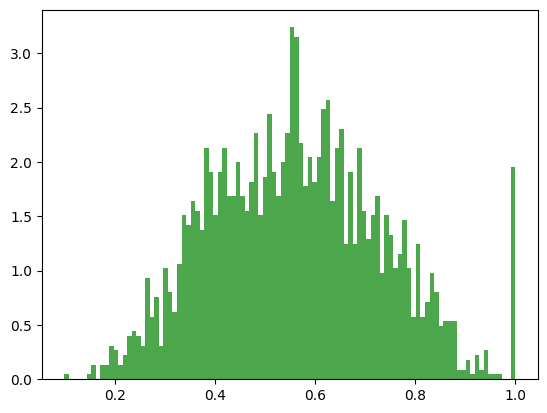

In [16]:
num_bins = 100
plt.hist(
    list(scores), 
    num_bins, 
    density = 1, 
    color ='green',
    alpha = 0.7
)

In [17]:
acc_list = []

for threshold in range(2, 10, 1):
    t = threshold/10
    acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding", threshold=t)
    acc_list.append({
        "accuracy": acc,
        "threshold": t
    })

Accuracy: 99.2%
Accuracy: 94.64%
Accuracy: 80.76%
Accuracy: 62.72%
Accuracy: 40.52%
Accuracy: 21.12%
Accuracy: 8.56%
Accuracy: 2.6%


<AxesSubplot: xlabel='threshold'>

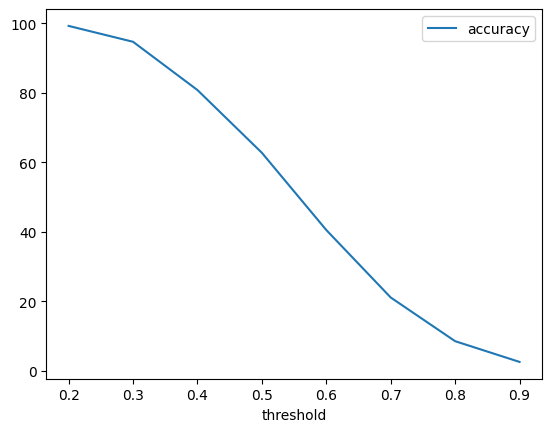

In [18]:
acc_emb_df = pd.DataFrame(acc_list)
acc_emb_df.plot(
    x = "threshold",
    y = "accuracy"
)